# TomoPy Practice
## Setup
First make sure working environment is correct.

In [1]:
import os
print(os.environ['CONDA_DEFAULT_ENV'])

tomopy


Import tomopy for tomographic data manipulation, dxexchange to import data sets, and mathplotlib for plotting results.

In [1]:
# Packages
import tomopy
import dxchange
import matplotlib.pyplot as plt

astropy module not found
olefile module not found


## Processing Dataset Into Tomographic Reconstruction
Import the dataset and plot the sinogram.

In [12]:
# Importing data set
proj, flat, dark, theta = dxchange.read_aps_32id(
    fname='/home/liam/Documents/Tomography/tooth.h5',
    sino=(0, 2),  # Select the sinogram range to reconstruct.
)

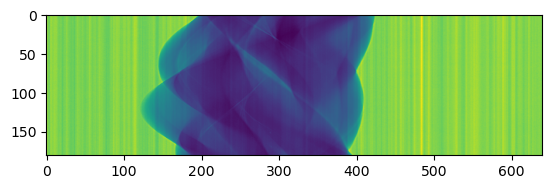

In [13]:
# Plotting raw sinogram
plt.imshow(proj[:, 0, :])
plt.show()

If the angular information can not be obtained from raw data, the angle must be manually set.

In [14]:
# Setting angles
if theta is None:
    theta = tomopy.angles(proj.shape[0])

Perform a flat field correction of the raw deta using
$\frac{proj - dark}{flat - dark}$
and linearize the data using $-\log(proj)$.

In [15]:
# Normalizing and linearizing data
proj = tomopy.normalize(proj, flat, dark)
proj = tomopy.minus_log(proj)

Find the rotation center using one of the various TomoPy methods.

In [16]:
rot_center = tomopy.find_center(proj, theta, init = 290, ind = 0, tol = 0.5)

Now using the modified data and determined center of rotation, use the gridrec algorithm to reconstruct the tomography.

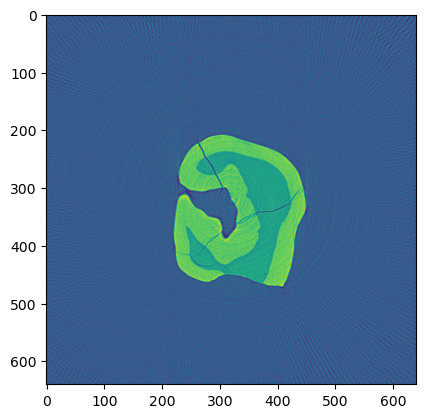

In [18]:
# Reconstructing using gridrec
recon = tomopy.recon(proj, theta, center = rot_center, algorithm = 'gridrec', sinogram_order = False)
plt.imshow(recon[0])
plt.show()

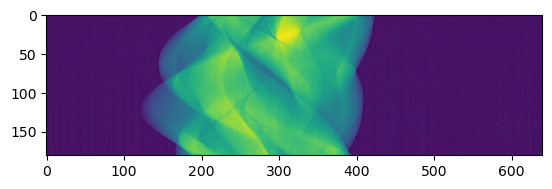

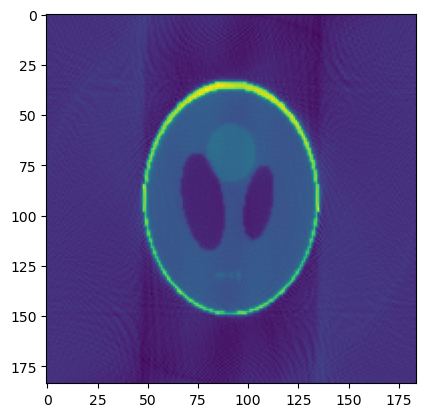

In [20]:
# Generate an object with uniformly spaced scan angles and reconstruct with ART
obj = tomopy.shepp3d()
ang = tomopy.angles(180)
sim = tomopy.project(obj, ang)
rec = tomopy.recon(sim, ang, algorithm='art')

# Plotting raw sinogram
plt.imshow(proj[:, 0, :])
plt.show()

# Show 64th slice of the reconstructed object.
plt.imshow(rec[64])
plt.show()